In [1]:
import numpy as np
import pandas as pd
import json
import csv
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# read in datasets
under5 = pd.read_csv("data/Pre-processing/Under5Mortarity.csv") # data for moartarity rate for children under 5
vaccine = pd.read_csv("data/Pre-processing/vaccine.csv")        # data for vaccine coverates

In [3]:
# display the number of countries in each dataset
print("ISO Code in under5: {0}, vaccine: {1}".format(len(under5['ISO Code'].unique()), len(vaccine.ISO_code.unique())))

ISO Code in under5: 197, vaccine: 194


In [4]:
# find the common countries across the three datasets
under5_idx = pd.Index(under5['ISO Code'])
vaccine_idx = pd.Index(vaccine.ISO_code.unique())
common_countries = under5_idx.intersection(vaccine_idx)
print(len(common_countries))

194


In [5]:
# output the common countries to JSON file
ISO_File = open("data/Pre-processing/ISO_list_in_dataset.json", "w")
ISO_File.write(json.dumps(list(common_countries.to_series())))
ISO_File.close()

In [6]:
# convert ISO to Country Names convertion table from CSV to JSON format
ISO2Names = {}
with open("data/Pre-processing/ISO2Names.csv", "r") as f:
    reader = csv.reader(f)
    for row in reader:
        ISO2Names[row[0]] = row[1]
ISO2Name_File = open("data/Pre-processing/ISO2Name.json", "w")
ISO2Name_File.write(json.dumps(ISO2Names))
ISO2Name_File.close()

In [7]:
# convert data to rates and arrange columns in increasing order of years
under5 = under5.set_index("ISO Code").ix[:, 2:].apply(pd.to_numeric, errors="coerce").apply(lambda x: x/1000)
vaccine = vaccine.set_index(["ISO_code", "Vaccine"]).ix[:, 2:].apply(lambda x: x/100)
vaccine = vaccine[vaccine.columns[::-1]]

In [8]:
# find the maximum value in the under5 dataset
print(under5.max(numeric_only=True).max())

0.4435


0.3369


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x111749908>]], dtype=object)

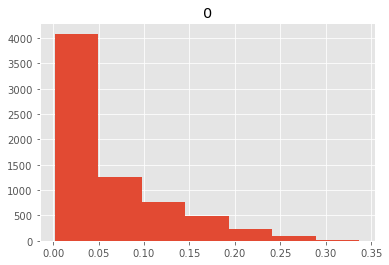

In [15]:
print(under5.iloc[:, 30:].max(numeric_only=True).max())
pd.DataFrame(under5.iloc[:, 30:].values.flatten()).hist(bins=7)

In [9]:
# output the dataset to csv file
under5.to_csv("data/under5.csv")
vaccine.to_csv("data/vaccine.csv")

In [23]:
vaccine_in_country = {}
for c, v in vaccine.index:
    vaccine_in_country.setdefault(c, []).append(v)

v_in_c_file = open("data/Vaccine_in_Country.json", "w")
v_in_c_file.write(json.dumps(vaccine_in_country))
v_in_c_file.close()

max = 0
for c in vaccine_in_country:
    if len(vaccine_in_country[c]) > max:
        max = len(vaccine_in_country[c])
max

15